In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split

## EDA

In [25]:
hr=pd.read_csv("C:/Users/hice0/Desktop/머신러닝/R/hr_original.csv",engine='python')
hr = hr.drop('sales',axis=1)
hr.columns = ['satisfaction','evaluation','Nproject','avgMonthlyhrs','yrsAtCompany','workAccident','left','promotion','salary'] # inplace=True)

# salary 바꿈
hr.salary, uniques = pd.factorize(hr.salary)
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
satisfaction     14999 non-null float64
evaluation       14999 non-null float64
Nproject         14999 non-null int64
avgMonthlyhrs    14999 non-null int64
yrsAtCompany     14999 non-null int64
workAccident     14999 non-null int64
left             14999 non-null int64
promotion        14999 non-null int64
salary           14999 non-null int64
dtypes: float64(2), int64(7)
memory usage: 1.0 MB


In [48]:
hr.describe()

,satisfaction,evaluation,Nproject,avgMonthlyhrs,yrsAtCompany,workAccident,left,promotion,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000


In [9]:
hr.left.value_counts() #left는 이직한 사람들

0    11428
1     3571
Name: left, dtype: int64

In [28]:
hr.left.value_counts()[1] #left는 이직한 사람들

3571

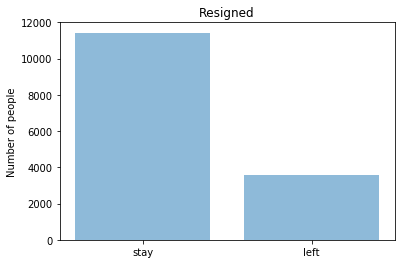

In [30]:
# 이직 안이직  plot
objects = ('stay', 'left')
y_pos = np.arange(len(objects))
performance = [hr.left.value_counts()[0], hr.left.value_counts()[1]]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of people')
plt.title('Resigned')
plt.show()

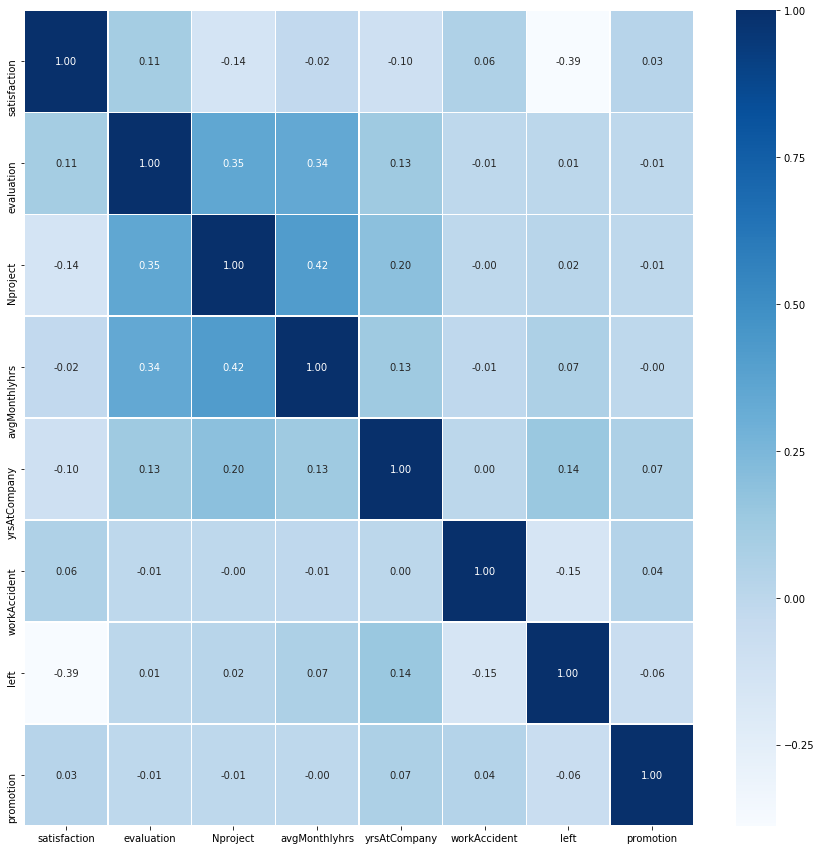

In [37]:
#  cor plot
plt.figure(figsize=(15,15))
sns.heatmap(data = hr.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

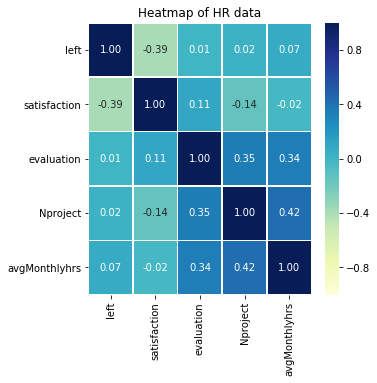

In [48]:
# cor plot with   5개 변수
plt.figure(figsize=(5,5))
ax=sns.heatmap(data = hr[['left','satisfaction','evaluation','Nproject','avgMonthlyhrs']].corr(), 
               annot=True,  fmt = '.2f', linewidths=.5,  cmap="YlGnBu",vmin=-1, vmax=1)
plt.title('Heatmap of HR data')
plt.show()



<IPython.core.display.Javascript object>


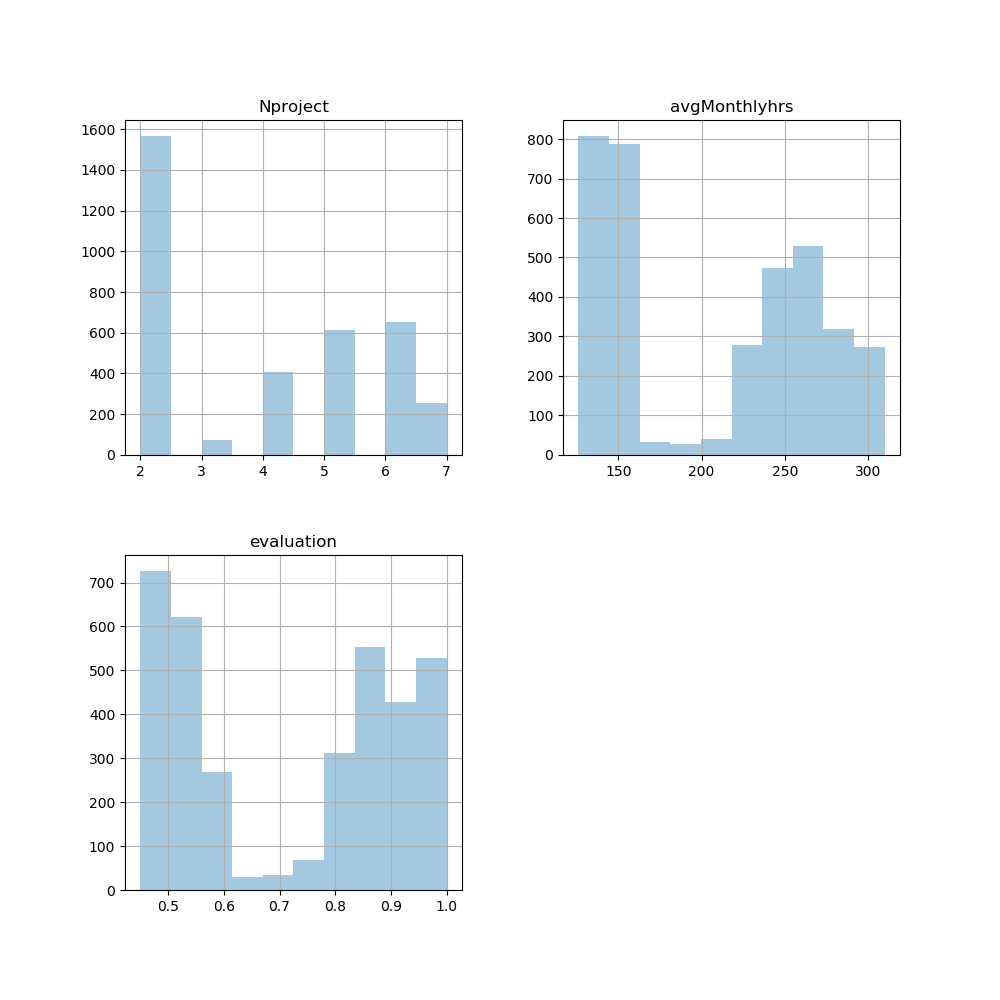

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4FA475550>,
      dtype=object)

In [131]:
# left 한 사람들만
hr[hr.left>0][['evaluation','Nproject','avgMonthlyhrs']].hist(figsize=(10,10),alpha=0.4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4A6A26780>,
      dtype=object)

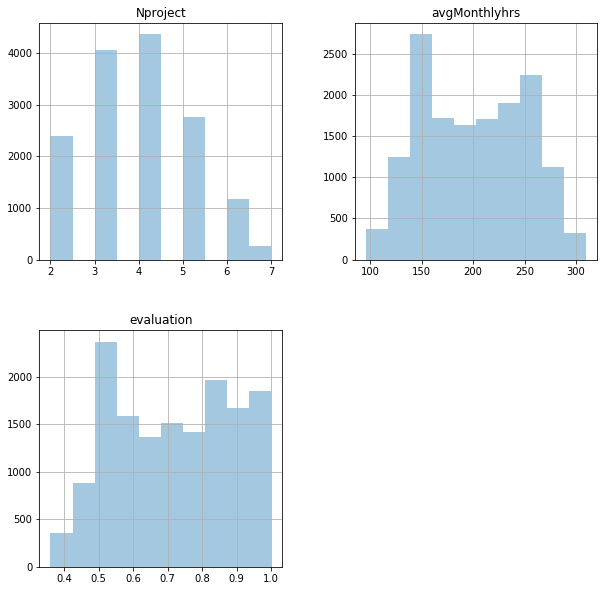

In [91]:
# 전체 사람들
hr[['evaluation','Nproject','avgMonthlyhrs']].hist(figsize=(10,10),alpha=0.4)

In [54]:
hr[['evaluation','Nproject','avgMonthlyhrs']].describe()

,evaluation,Nproject,avgMonthlyhrs
count,14999.000000,14999.000000,14999.000000
mean,0.716102,3.803054,201.050337
std,0.171169,1.232592,49.943099
min,0.360000,2.000000,96.000000
25%,0.560000,3.000000,156.000000
50%,0.720000,4.000000,200.000000
75%,0.870000,5.000000,245.000000
max,1.000000,7.000000,310.000000


<IPython.core.display.Javascript object>


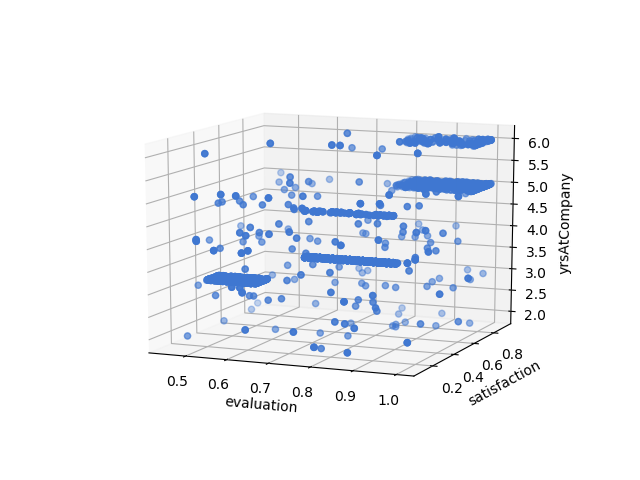

In [122]:
#  3차원 scatter  plot

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib notebook

hr1 = hr[hr.left>0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = hr1.evaluation 
y = hr1.satisfaction
z = hr1.yrsAtCompany

ax.scatter(x, y, z, c='#3f77d1', marker='o')

ax.set_xlabel('evaluation')
ax.set_ylabel('satisfaction')
ax.set_zlabel('yrsAtCompany')

plt.show()

## SMOTE &  ADASYN

### SMOTE

In [3]:
# split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hr.drop('left',
                                                                axis=1).drop('salary',
                                                                             axis=1), 
                                                        hr.left, test_size = 0.2, random_state = 0)

In [4]:
from imblearn.over_sampling import SMOTE, ADASYN
sm = SMOTE(random_state=42, kind='regular')
X_trainS, y_trainS = sm.fit_sample(X_train, y_train)
np.bincount(y_trainS)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

array([9129, 9129], dtype=int64)

### ADASYN

In [5]:
from collections import Counter
ada=ADASYN(random_state=0)
X_trainA,y_trainA=ada.fit_sample(X_train,y_train)
print('Resampled dataset shape from ADASYN %s' % Counter(y_trainA))

Resampled dataset shape from ADASYN Counter({0: 9129, 1: 9072})


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## KNN

In [7]:
# with  std
from sklearn.preprocessing import StandardScaler  #Scikit-Learn 의 model_selection library를 train_test_split로 명명
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)    # training data의 표준화
X_test_std=sc.transform(X_test)      # test data의 표준화

#### determining K value

In [36]:
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(3, 25),'p':[1,2]}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train_std, y_train)
knn_gscv.best_params_

{'n_neighbors': 6, 'p': 2}

In [52]:
# KNN 의 적용  with std
from sklearn.neighbors import KNeighborsClassifier  #KNN 불러오기
from sklearn.metrics import accuracy_score    #정확도 계산을 위한 모듈 import
from sklearn.metrics import confusion_matrix#  오분류표 작성을 위한 모듈 import

knn=KNeighborsClassifier(n_neighbors=6,p=2) #5개의 인접한이웃, 거리측정기준:유클리드 
knn.fit(X_train_std,y_train) #모델 fitting과정
y_train_pred=knn.predict(X_train_std) #train data의 y값 예측치
y_test_pred=knn.predict(X_test_std)  #모델을 적용한 test data의 y값 예측치
conf=confusion_matrix(y_true=y_test,y_pred=y_test_pred) # 대각원소가 각각 setosa, versicolor, virginica를 정확하게 분류한 갯수.

print('Misclassified training samples: %d' %(y_train!=y_train_pred).sum()) #오분류 데이터 갯수 확인
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum()) #오분류 데이터 갯수 확인
print(accuracy_score(y_test,y_test_pred)) # 45개 test sample중 42개가 정확하게 분류됨.
print(conf)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

Misclassified training samples: 315
Misclassified test samples: 91
0.9696666666666667
[[2273   26]
 [  65  636]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2299
           1       0.96      0.91      0.93       701

    accuracy                           0.97      3000
   macro avg       0.97      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



In [22]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(3, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)
knn_gscv.best_params_

{'n_neighbors': 6}

In [53]:
# KNN 의 적용  without std
knn=KNeighborsClassifier(n_neighbors=6,p=2) #5개의 인접한이웃, 거리측정기준:유클리드 
knn.fit(X_train,y_train) #모델 fitting과정
y_train_pred=knn.predict(X_train) #train data의 y값 예측치
y_test_pred=knn.predict(X_test)  #모델을 적용한 test data의 y값 예측치
conf=confusion_matrix(y_true=y_test,y_pred=y_test_pred) # 대각원소가 각각 setosa, versicolor, virginica를 정확하게 분류한 갯수.

print('Misclassified training samples: %d' %(y_train!=y_train_pred).sum()) #오분류 데이터 갯수 확인
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum()) #오분류 데이터 갯수 확인
print(accuracy_score(y_test,y_test_pred)) # 45개 test sample중 42개가 정확하게 분류됨.
print(conf)
print(recall_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Misclassified training samples: 444
Misclassified test samples: 121
0.9596666666666667
[[2237   62]
 [  59  642]]
0.9158345221112696
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2299
           1       0.91      0.92      0.91       701

    accuracy                           0.96      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000



In [26]:
# KNN 의 적용  with  SMOTE - determining  K value
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(3, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_trainS, y_trainS)
knn_gscv.best_params_

{'n_neighbors': 4}

In [54]:
# KNN 의 적용  with  SMOTE
knn=KNeighborsClassifier(n_neighbors=4,p=2) #5개의 인접한이웃, 거리측정기준:유클리드 
knn.fit(X_trainS,y_trainS) #모델 fitting과정
y_train_pred=knn.predict(X_trainS) #train data의 y값 예측치
y_test_pred=knn.predict(X_test)  #모델을 적용한 test data의 y값 예측치
conf=confusion_matrix(y_true=y_test,y_pred=y_test_pred) # 대각원소가 각각 setosa, versicolor, virginica를 정확하게 분류한 갯수.

print('Misclassified training samples: %d' %(y_trainS!=y_train_pred).sum()) #오분류 데이터 갯수 확인
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum()) #오분류 데이터 갯수 확인
print(accuracy_score(y_test,y_test_pred)) # 45개 test sample중 42개가 정확하게 분류됨.
print(conf)
print(recall_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Misclassified training samples: 377
Misclassified test samples: 115
0.9616666666666667
[[2212   87]
 [  28  673]]
0.9600570613409415
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2299
           1       0.89      0.96      0.92       701

    accuracy                           0.96      3000
   macro avg       0.94      0.96      0.95      3000
weighted avg       0.96      0.96      0.96      3000



In [28]:
# KNN 의 적용  with  SMOTE with std- determining  K value
sc=StandardScaler()
sc.fit(X_trainS)
X_trainS_std=sc.transform(X_trainS)    # training data의 표준화
X_test_std=sc.transform(X_test)      # test data의 표준화

knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(3, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_trainS_std, y_trainS)
knn_gscv.best_params_

{'n_neighbors': 3}

In [55]:
# KNN 의 적용  with  SMOTE with std
sc=StandardScaler()
sc.fit(X_trainS)
X_trainS_std=sc.transform(X_trainS)    # training data의 표준화
X_test_std=sc.transform(X_test)      # test data의 표준화

knn=KNeighborsClassifier(n_neighbors=3,p=2) #5개의 인접한이웃, 거리측정기준:유클리드 
knn.fit(X_trainS_std,y_trainS) #모델 fitting과정
y_train_pred=knn.predict(X_trainS_std) #train data의 y값 예측치
y_test_pred=knn.predict(X_test_std)  #모델을 적용한 test data의 y값 예측치
conf=confusion_matrix(y_true=y_test,y_pred=y_test_pred) # 대각원소가 각각 setosa, versicolor, virginica를 정확하게 분류한 갯수.

print('Misclassified training samples: %d' %(y_trainS!=y_train_pred).sum()) #오분류 데이터 갯수 확인
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum()) #오분류 데이터 갯수 확인
print(accuracy_score(y_test,y_test_pred)) # 45개 test sample중 42개가 정확하게 분류됨.
print(conf)
print(recall_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Misclassified training samples: 247
Misclassified test samples: 92
0.9693333333333334
[[2225   74]
 [  18  683]]
0.9743223965763196
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2299
           1       0.90      0.97      0.94       701

    accuracy                           0.97      3000
   macro avg       0.95      0.97      0.96      3000
weighted avg       0.97      0.97      0.97      3000



In [32]:
# KNN 의 적용  with  ADASYN- determining  K value
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(3, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_trainA, y_trainA)
knn_gscv.best_params_

{'n_neighbors': 3}

In [56]:
# KNN 의 적용  with  ADASYN
knn=KNeighborsClassifier(n_neighbors=3,p=2) #5개의 인접한이웃, 거리측정기준:유클리드 
knn.fit(X_trainA,y_trainA) #모델 fitting과정
y_train_pred=knn.predict(X_trainA) #train data의 y값 예측치
y_test_pred=knn.predict(X_test)  #모델을 적용한 test data의 y값 예측치
conf=confusion_matrix(y_true=y_test,y_pred=y_test_pred) # 대각원소가 각각 setosa, versicolor, virginica를 정확하게 분류한 갯수.

print('Misclassified training samples: %d' %(y_trainA!=y_train_pred).sum()) #오분류 데이터 갯수 확인
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum()) #오분류 데이터 갯수 확인
print(accuracy_score(y_test,y_test_pred)) # 45개 test sample중 42개가 정확하게 분류됨.
print(conf)
print(recall_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Misclassified training samples: 444
Misclassified test samples: 193
0.9356666666666666
[[2120  179]
 [  14  687]]
0.9800285306704708
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      2299
           1       0.79      0.98      0.88       701

    accuracy                           0.94      3000
   macro avg       0.89      0.95      0.92      3000
weighted avg       0.95      0.94      0.94      3000



In [34]:
# KNN 의 적용  with  ADASYN with std- determining  K value
sc=StandardScaler()
sc.fit(X_trainA)
X_trainA_std=sc.transform(X_trainA)    # training data의 표준화
X_test_std=sc.transform(X_test)      # test data의 표준화


knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(3, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_trainA_std, y_trainA)
knn_gscv.best_params_

{'n_neighbors': 3}

In [57]:
# KNN 의 적용  with  ADASYN with std
sc=StandardScaler()
sc.fit(X_trainA)
X_trainA_std=sc.transform(X_trainA)    # training data의 표준화
X_test_std=sc.transform(X_test)      # test data의 표준화

knn=KNeighborsClassifier(n_neighbors=3,p=2) #5개의 인접한이웃, 거리측정기준:유클리드 
knn.fit(X_trainA_std,y_trainA) #모델 fitting과정
y_train_pred=knn.predict(X_trainA_std) #train data의 y값 예측치
y_test_pred=knn.predict(X_test_std)  #모델을 적용한 test data의 y값 예측치
conf=confusion_matrix(y_true=y_test,y_pred=y_test_pred) # 대각원소가 각각 setosa, versicolor, virginica를 정확하게 분류한 갯수.

print('Misclassified training samples: %d' %(y_trainA!=y_train_pred).sum()) #오분류 데이터 갯수 확인
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum()) #오분류 데이터 갯수 확인
print(accuracy_score(y_test,y_test_pred)) # 45개 test sample중 42개가 정확하게 분류됨.
print(conf)
print(recall_score(y_test, y_test_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

Misclassified training samples: 323
Misclassified test samples: 146
0.9513333333333334
[[2166  133]
 [  13  688]]
0.9814550641940085
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      2299
           1       0.84      0.98      0.90       701

    accuracy                           0.95      3000
   macro avg       0.92      0.96      0.94      3000
weighted avg       0.96      0.95      0.95      3000



## Logistic with salary

In [65]:
# hr.info()
# salary 추가
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hr.drop('left',axis=1), 
                                                        hr.left, test_size = 0.2, random_state = 0)

In [66]:
from imblearn.over_sampling import SMOTE, ADASYN
sm = SMOTE(random_state=42, kind='regular')
X_trainS, y_trainS = sm.fit_sample(X_train, y_train)
np.bincount(y_trainS)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([9129, 9129], dtype=int64)

In [67]:
from collections import Counter
ada=ADASYN(random_state=0)
X_trainA,y_trainA=ada.fit_sample(X_train,y_train)
print('Resampled dataset shape from ADASYN %s' % Counter(y_trainA))

Resampled dataset shape from ADASYN Counter({0: 9129, 1: 9122})


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [68]:
# with  raw 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
lr = LogisticRegression()
lr.fit(X_train, y_train)
yPred = lr.predict(X_test)
print(classification_report(y_test, yPred))
print(confusion_matrix(y_test,yPred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87      2299
           1       0.59      0.36      0.45       701

    accuracy                           0.79      3000
   macro avg       0.71      0.64      0.66      3000
weighted avg       0.77      0.79      0.77      3000

[[2127  172]
 [ 449  252]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [69]:
# with SMOTE
lr.fit(X_trainS, y_trainS)
yPred = lr.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, yPred))
print(confusion_matrix(y_test,yPred))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82      2299
           1       0.49      0.81      0.61       701

    accuracy                           0.76      3000
   macro avg       0.71      0.77      0.71      3000
weighted avg       0.82      0.76      0.77      3000

[[1698  601]
 [ 133  568]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [70]:
# with ADASYN
lr.fit(X_trainA, y_trainA)
yPred = lr.predict(X_test)
print(classification_report(y_test, yPred))
print(confusion_matrix(y_test,yPred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      2299
           1       0.45      0.76      0.56       701

    accuracy                           0.72      3000
   macro avg       0.68      0.74      0.68      3000
weighted avg       0.80      0.72      0.74      3000

[[1639  660]
 [ 167  534]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


###  Logistic Regularization

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hr.drop('left',axis=1),
                                                        hr.left, test_size = 0.2, random_state = 0)
# SMOTE
sm = SMOTE(random_state=42, kind='regular')
X_trainS, y_trainS = sm.fit_sample(X_train, y_train)
ada=ADASYN(random_state=0)
X_trainA,y_trainA=ada.fit_sample(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [72]:
# determining regularization
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
param_grid = {'penalty': ['l1','l2'],'C':[0.1,1,10]}
lr_gscv = GridSearchCV(lr, param_grid, cv=5)
#fit model to data
lr_gscv.fit(X_train, y_train)
lr_gscv.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

{'C': 10, 'penalty': 'l2'}

In [28]:
from sklearn.linear_model import LogisticRegression
lr2_10 = LogisticRegression(penalty='l2', C=10.0)  # L2 with C(=1/λ)=10
lr2_10.fit(X_train,y_train)
yPred = lr2_10.predict(X_test)
print(classification_report(y_test, yPred))
print(confusion_matrix(y_test,yPred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2299
           1       0.59      0.36      0.45       701

    accuracy                           0.79      3000
   macro avg       0.71      0.64      0.66      3000
weighted avg       0.77      0.79      0.77      3000

[[2125  174]
 [ 448  253]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [34]:
print(lr2_10.coef_)

[[-4.25491905  0.87915801 -0.39210159  0.00469825  0.47444157 -1.57994168
  -1.19615916 -0.71388691]]


In [75]:
# determining regularization
lr = LogisticRegression()
param_grid = {'penalty': ['l1','l2'],'C':[0.1,1,10]}
lr_gscv = GridSearchCV(lr, param_grid, cv=5)
#fit model to data
lr_gscv.fit(X_trainS, y_trainS)
lr_gscv.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

{'C': 0.1, 'penalty': 'l2'}

In [33]:
lr2_10 = LogisticRegression(penalty='l2', C=0.1)  # L2 with C(=1/λ)=10
lr2_10.fit(X_trainS,y_trainS)
yPred = lr2_10.predict(X_test)
print(classification_report(y_test, yPred))
print(confusion_matrix(y_test,yPred))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82      2299
           1       0.49      0.82      0.61       701

    accuracy                           0.76      3000
   macro avg       0.71      0.78      0.72      3000
weighted avg       0.83      0.76      0.77      3000

[[1695  604]
 [ 124  577]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [35]:
print(lr2_10.coef_)

[[-4.25491905  0.87915801 -0.39210159  0.00469825  0.47444157 -1.57994168
  -1.19615916 -0.71388691]]


In [77]:
# determining regularization
lr = LogisticRegression()
param_grid = {'penalty': ['l1','l2'],'C':[0.1,1,10]}
lr_gscv = GridSearchCV(lr, param_grid, cv=5)
#fit model to data
lr_gscv.fit(X_trainA, y_trainA)
lr_gscv.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

{'C': 10, 'penalty': 'l2'}

In [36]:
lr2_10 = LogisticRegression(penalty='l2', C=10.0)  # L2 with C(=1/λ)=10
lr2_10.fit(X_trainA,y_trainA)
yPred = lr2_10.predict(X_test)
print(classification_report(y_test, yPred))
print(confusion_matrix(y_test,yPred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      2299
           1       0.45      0.77      0.57       701

    accuracy                           0.73      3000
   macro avg       0.68      0.74      0.68      3000
weighted avg       0.80      0.73      0.74      3000

[[1638  661]
 [ 163  538]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
print(lr2_10.coef_)

[[-3.51099785e+00  1.94435598e+00 -1.37247239e-01  3.37207229e-03
   3.87479034e-01 -1.46760995e+00 -9.56103115e-01 -6.85687705e-01]]


### [안함] Logistic with groups

## LDA - without salary

In [81]:
# split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hr.drop('left',
                                                                axis=1).drop('salary',
                                                                             axis=1), 
                                                        hr.left, test_size = 0.2, random_state = 0)

In [82]:
from imblearn.over_sampling import SMOTE, ADASYN
sm = SMOTE(random_state=42, kind='regular')
X_trainS, y_trainS = sm.fit_sample(X_train, y_train)
np.bincount(y_trainS)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([9129, 9129], dtype=int64)

In [83]:
from collections import Counter
ada=ADASYN(random_state=0)
X_trainA,y_trainA=ada.fit_sample(X_train,y_train)
print('Resampled dataset shape from ADASYN %s' % Counter(y_trainA))

Resampled dataset shape from ADASYN Counter({0: 9129, 1: 9072})


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [84]:
# LDA with raw
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
cld=LinearDiscriminantAnalysis(store_covariance=True) #store_covariance 안하면 밑에꺼 안나옴
cld.fit(X_train, y_train) # LDA 적합
y_train_pred=cld.predict(X_train)
y_test_pred=cld.predict(X_test)

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))  # 각 행은 setosa, versicolor, virginica

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      2299
           1       0.47      0.25      0.33       701

    accuracy                           0.76      3000
   macro avg       0.64      0.58      0.59      3000
weighted avg       0.72      0.76      0.73      3000

[[2101  198]
 [ 523  178]]


In [85]:
# LDA with SMOTE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
cld=LinearDiscriminantAnalysis(store_covariance=True) #store_covariance 안하면 밑에꺼 안나옴
cld.fit(X_trainS, y_trainS) # LDA 적합
y_train_pred=cld.predict(X_trainS)
y_test_pred=cld.predict(X_test)

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))  # 각 행은 setosa, versicolor, virginica

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      2299
           1       0.46      0.78      0.58       701

    accuracy                           0.74      3000
   macro avg       0.69      0.75      0.69      3000
weighted avg       0.81      0.74      0.76      3000

[[1660  639]
 [ 151  550]]


In [86]:
# LDA with ADASYN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
cld=LinearDiscriminantAnalysis(store_covariance=True) #store_covariance 안하면 밑에꺼 안나옴
cld.fit(X_trainA, y_trainA) # LDA 적합
y_train_pred=cld.predict(X_trainA)
y_test_pred=cld.predict(X_test)

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))  # 각 행은 setosa, versicolor, virginica

              precision    recall  f1-score   support

           0       0.95      0.71      0.81      2299
           1       0.48      0.89      0.62       701

    accuracy                           0.75      3000
   macro avg       0.72      0.80      0.72      3000
weighted avg       0.84      0.75      0.77      3000

[[1623  676]
 [  79  622]]


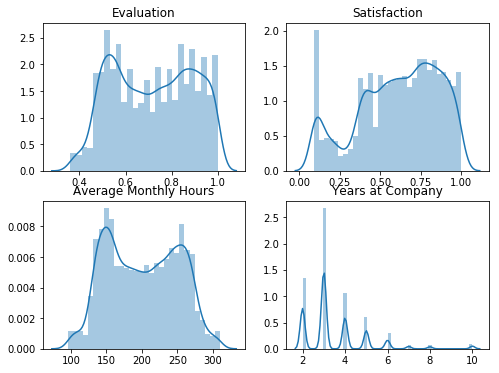

In [122]:
plt.figure(figsize=(8, 6))
plt.subplot(2,2,1)
sns.distplot(hr['evaluation'])
plt.title('Evaluation')
plt.xlabel('')
plt.subplot(2,2,2)
sns.distplot(hr['satisfaction'])
plt.title('Satisfaction')
plt.xlabel('')
plt.subplot(2,2,3)
sns.distplot(hr['avgMonthlyhrs'])
plt.title('Average Monthly Hours')
plt.xlabel('')
plt.subplot(2,2,4)
sns.distplot(hr['yrsAtCompany'])
plt.title('Years at Company')
plt.xlabel('')
plt.show()

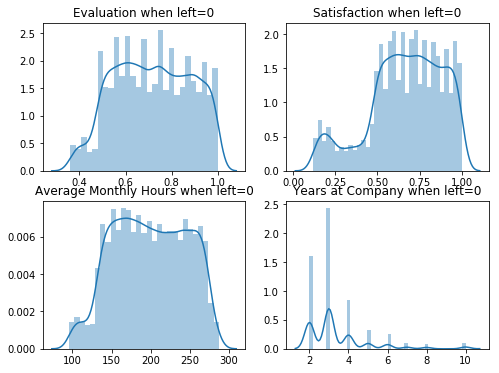

In [123]:
hr0 = hr[hr.left<1]
plt.figure(figsize=(8, 6))
plt.subplot(2,2,1)
sns.distplot(hr0['evaluation'])
plt.title('Evaluation when left=0')
plt.xlabel('')
plt.subplot(2,2,2)
sns.distplot(hr0['satisfaction'])
plt.title('Satisfaction when left=0')
plt.xlabel('')
plt.subplot(2,2,3)
sns.distplot(hr0['avgMonthlyhrs'])
plt.title('Average Monthly Hours when left=0')
plt.xlabel('')
plt.subplot(2,2,4)
sns.distplot(hr0['yrsAtCompany'])
plt.title('Years at Company when left=0')
plt.xlabel('')
plt.show()

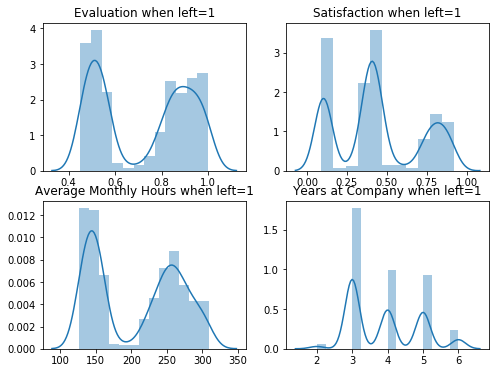

In [124]:
hr1 = hr[hr.left>0]
plt.figure(figsize=(8, 6))
plt.subplot(2,2,1)
sns.distplot(hr1['evaluation'])
plt.title('Evaluation when left=1')
plt.xlabel('')
plt.subplot(2,2,2)
sns.distplot(hr1['satisfaction'])
plt.title('Satisfaction when left=1')
plt.xlabel('')
plt.subplot(2,2,3)
sns.distplot(hr1['avgMonthlyhrs'])
plt.title('Average Monthly Hours when left=1')
plt.xlabel('')
plt.subplot(2,2,4)
sns.distplot(hr1['yrsAtCompany'])
plt.title('Years at Company when left=1')
plt.xlabel('')
plt.show()

## QDA without salary

In [87]:
# QDA with raw
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
cqd=QuadraticDiscriminantAnalysis(store_covariance=True)
cqd.fit(X_train, y_train) # QDA 적합
y_train_pred=cqd.predict(X_train)
y_test_pred=cqd.predict(X_test)

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))  # 각 행은 setosa, versicolor, virginica

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      2299
           1       0.76      0.89      0.82       701

    accuracy                           0.91      3000
   macro avg       0.86      0.90      0.88      3000
weighted avg       0.91      0.91      0.91      3000

[[2099  200]
 [  80  621]]


In [88]:
# QDA with SMOTE
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
cqd=QuadraticDiscriminantAnalysis(store_covariance=True)
cqd.fit(X_trainS, y_trainS) # QDA 적합
y_train_pred=cqd.predict(X_trainS)
y_test_pred=cqd.predict(X_test)

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))  # 각 행은 setosa, versicolor, virginica

              precision    recall  f1-score   support

           0       0.96      0.87      0.92      2299
           1       0.68      0.89      0.77       701

    accuracy                           0.88      3000
   macro avg       0.82      0.88      0.84      3000
weighted avg       0.90      0.88      0.88      3000

[[2007  292]
 [  79  622]]


In [89]:
# QDA with ADASYN
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
cqd=QuadraticDiscriminantAnalysis(store_covariance=True)
cqd.fit(X_trainA, y_trainA) # QDA 적합
y_train_pred=cqd.predict(X_trainA)
y_test_pred=cqd.predict(X_test)

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))  # 각 행은 setosa, versicolor, virginica

              precision    recall  f1-score   support

           0       0.97      0.66      0.79      2299
           1       0.46      0.94      0.61       701

    accuracy                           0.72      3000
   macro avg       0.71      0.80      0.70      3000
weighted avg       0.85      0.72      0.75      3000

[[1514  785]
 [  42  659]]


## Gaussian Naive Bayes

In [90]:
# Gaussian Naive Bayes with raw
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train, y_train)
y_test_pred=gnb.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))  # 각 행은 setosa, versicolor, virginica

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      2299
           1       0.55      0.73      0.63       701

    accuracy                           0.80      3000
   macro avg       0.73      0.77      0.75      3000
weighted avg       0.83      0.80      0.81      3000

[[1887  412]
 [ 190  511]]


In [91]:
# Gaussian Naive Bayes with SMOTE
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_trainS, y_trainS)
y_test_pred=gnb.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))  # 각 행은 setosa, versicolor, virginica

              precision    recall  f1-score   support

           0       0.95      0.43      0.59      2299
           1       0.33      0.93      0.49       701

    accuracy                           0.55      3000
   macro avg       0.64      0.68      0.54      3000
weighted avg       0.81      0.55      0.57      3000

[[ 990 1309]
 [  49  652]]


In [92]:
# Gaussian Naive Bayes with ADASYN
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_trainA, y_trainA)
y_test_pred=gnb.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))  # 각 행은 setosa, versicolor, virginica

              precision    recall  f1-score   support

           0       0.97      0.44      0.61      2299
           1       0.34      0.95      0.50       701

    accuracy                           0.56      3000
   macro avg       0.66      0.70      0.56      3000
weighted avg       0.82      0.56      0.58      3000

[[1019 1280]
 [  32  669]]


## CART with Salary

In [38]:
# hr.info()
# salary 추가
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hr.drop('left',axis=1), 
                                                        hr.left, test_size = 0.2, random_state = 0)

In [20]:
from imblearn.over_sampling import SMOTE, ADASYN
sm = SMOTE(random_state=42, kind='regular')
X_trainS, y_trainS = sm.fit_sample(X_train, y_train)
ada=ADASYN(random_state=0)
X_trainA,y_trainA=ada.fit_sample(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


####  표준화하고 oversampling

In [21]:
#표준화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# raw
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
# SMOTE
sm = SMOTE(random_state=42, kind='regular')
X_trainS_std, y_trainS = sm.fit_sample(X_train_std, y_train)
ada=ADASYN(random_state=0)
X_trainA_std,y_trainA=ada.fit_sample(X_train_std,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


####  표준화하기 전에 oversampling

In [19]:
#표준화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# raw
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
# SMOTE
sc.fit(X_train)
X_trainS_std = sc.transform(X_trainS)
X_testS_std = sc.transform(X_test_std)
# SMOTE
sc.fit(X_train)
X_trainA_std = sc.transform(X_trainA)
X_testA_std = sc.transform(X_test_std)

In [135]:
# GridSearchCV with std
from sklearn import tree  
dtc = tree.DecisionTreeClassifier(criterion='gini')
depth = np.arange(1,21)
param_grid = {'criterion':['gini','entropy'],'max_depth': depth,
              'max_leaf_nodes':[10,20,50,100,300],'min_samples_leaf':[10,20,100,300]}
dtc_gscv = GridSearchCV(dtc, param_grid, cv=5)
#fit model to data
dtc_gscv.fit(X_train_std, y_train)
dtc_gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 10}

In [22]:
# Classification Tree  with std
from sklearn import tree  # 또는 #from sklearn import DecisionTreeClassifier
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7, 
                                  max_leaf_nodes=20,  min_samples_leaf=10, random_state=1)
dtc.fit(X_train_std, y_train)
y_train_pred = dtc.predict(X_train_std)  # Training accuracy
y_test_pred = dtc.predict(X_test_std)    # Test accuracy

# Accuracy score
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))  # 각 행은 setosa, versicolor, virginica

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2299
           1       0.99      0.92      0.95       701

    accuracy                           0.98      3000
   macro avg       0.98      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000

[[2290    9]
 [  57  644]]


In [128]:
# GridSearchCV
from sklearn import tree  
dtc = tree.DecisionTreeClassifier(criterion='gini')
depth = np.arange(1,21)
param_grid = {'criterion':['gini','entropy'],'max_depth': depth,
              'max_leaf_nodes':[10,20,50,100,300],'min_samples_leaf':[10,20,100,300]}
dtc_gscv = GridSearchCV(dtc, param_grid, cv=5)
#fit model to data
dtc_gscv.fit(X_train, y_train)
dtc_gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 10}

In [39]:
# Classification Tree with raw
from sklearn import tree  # 또는 #from sklearn import DecisionTreeClassifier
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7, 
                                  max_leaf_nodes=20,  min_samples_leaf=10, random_state=1)
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)  # Training accuracy
y_test_pred = dtc.predict(X_test)    # Test accuracy

# Accuracy score
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))  # 각 행은 setosa, versicolor, virginica

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2299
           1       0.99      0.92      0.95       701

    accuracy                           0.98      3000
   macro avg       0.98      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000

[[2290    9]
 [  57  644]]


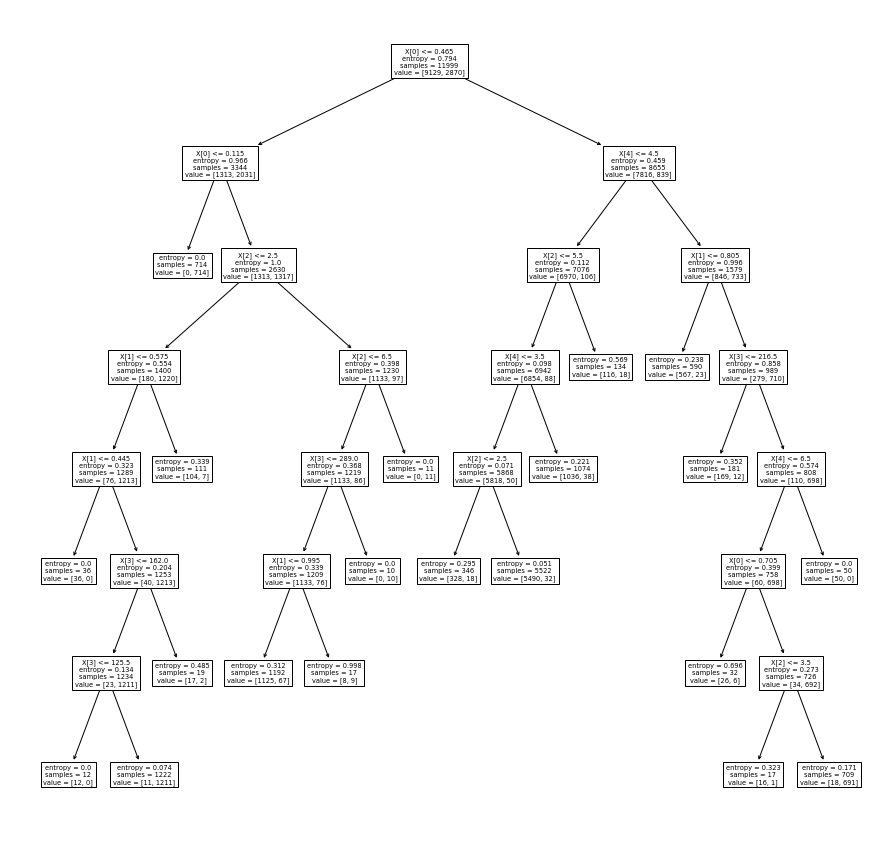

In [47]:
plt.figure(figsize=(15,15))
tree.plot_tree(dtc.fit(X_train,y_train))
plt.show()

In [58]:
# Graphic
# pip in
from pydotplus import graph_from_dot_data  # "pydotplus"는 따로 설치해야 함.
from sklearn.tree import export_graphviz
#import graphviz
feature2= ['satisfaction','evaluation','Nproject','avgMonthlyhrs','yrsAtCompany','workAccident','promotion','salary'] # inplace=True)

dot_data = export_graphviz(dtc, filled=True, rounded=True,
                           class_names=['left', 'not left'], 
                           feature_names=feature2,
                           out_file=None)
graph = graph_from_dot_data(dot_data)


from IPython.display import Image 
Image(graph.create_png())   # Console 창에 결과 그림 출력

InvocationException: GraphViz's executables not found

In [154]:
# GridSearchCV SMOTE std
from sklearn import tree  
dtc = tree.DecisionTreeClassifier(criterion='gini')
depth = np.arange(1,21)
param_grid = {'criterion':['gini','entropy'],'max_depth': depth,
              'max_leaf_nodes':[10,20,50,100,300],'min_samples_leaf':[10,20,100,300]}
dtc_gscv = GridSearchCV(dtc, param_grid, cv=5)
#fit model to data
dtc_gscv.fit(X_trainS_std, y_trainS)
dtc_gscv.best_params_

{'criterion': 'gini',
 'max_depth': 19,
 'max_leaf_nodes': 300,
 'min_samples_leaf': 10}

In [25]:
# Classification Tree with SMOTE with  std
from sklearn import tree  # 또는 #from sklearn import DecisionTreeClassifier
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=20, 
                                  max_leaf_nodes=300,  min_samples_leaf=10, random_state=1)
dtc.fit(X_trainS_std, y_trainS)
y_train_pred = dtc.predict(X_trainS_std)  # Training accuracy
y_test_pred = dtc.predict(X_test_std)    # Test accuracy

# Accuracy score
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))  # 각 행은 setosa, versicolor, virginica

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2299
           1       0.92      0.95      0.93       701

    accuracy                           0.97      3000
   macro avg       0.95      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000

[[2242   57]
 [  36  665]]


In [141]:
# GridSearchCV SMOTE
from sklearn import tree  
dtc = tree.DecisionTreeClassifier(criterion='gini')
depth = np.arange(1,21)
param_grid = {'criterion':['gini','entropy'],'max_depth': depth,
              'max_leaf_nodes':[10,20,50,100,300],'min_samples_leaf':[10,20,100,300]}
dtc_gscv = GridSearchCV(dtc, param_grid, cv=5)
#fit model to data
dtc_gscv.fit(X_trainS, y_trainS)
dtc_gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'max_leaf_nodes': 300,
 'min_samples_leaf': 10}

In [143]:
# Classification Tree with  SMOTE  with  raw
from sklearn import tree  # 또는 #from sklearn import DecisionTreeClassifier
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=17, 
                                  max_leaf_nodes=300,  min_samples_leaf=10, random_state=1)
dtc.fit(X_trainS, y_trainS)
y_train_pred = dtc.predict(X_trainS)  # Training accuracy
y_test_pred = dtc.predict(X_test)    # Test accuracy

# Accuracy score
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))  # 각 행은 setosa, versicolor, virginica

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2299
           1       0.95      0.94      0.94       701

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000

[[2261   38]
 [  41  660]]


In [9]:
# GridSearchCV ADASYN with std
from sklearn import tree  
dtc = tree.DecisionTreeClassifier(criterion='gini')
depth = np.arange(1,21)
param_grid = {'criterion':['gini','entropy'],'max_depth': depth,
              'max_leaf_nodes':[10,20,50,100,300],'min_samples_leaf':[10,20,100,300]}
dtc_gscv = GridSearchCV(dtc, param_grid, cv=5)
#fit model to data
dtc_gscv.fit(X_trainA_std, y_trainA)
dtc_gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_leaf_nodes': 300,
 'min_samples_leaf': 10}

In [24]:
# Classification Tree with  ADASYN  with  std
from sklearn import tree  # 또는 #from sklearn import DecisionTreeClassifier
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=20, 
                                  max_leaf_nodes=300,  min_samples_leaf=10, random_state=1)
dtc.fit(X_trainA_std, y_trainA)
y_train_pred = dtc.predict(X_trainA_std)  # Training accuracy
y_test_pred = dtc.predict(X_test_std)    # Test accuracy

# Accuracy score
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))  # 각 행은 setosa, versicolor, virginica

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2299
           1       0.89      0.97      0.92       701

    accuracy                           0.96      3000
   macro avg       0.94      0.96      0.95      3000
weighted avg       0.97      0.96      0.96      3000

[[2213   86]
 [  24  677]]


In [149]:
# GridSearchCV ADASYN with raw
from sklearn import tree  
dtc = tree.DecisionTreeClassifier(criterion='gini')
depth = np.arange(1,21)
param_grid = {'criterion':['gini','entropy'],'max_depth': depth,
              'max_leaf_nodes':[10,20,50,100,300],'min_samples_leaf':[10,20,100,300]}
dtc_gscv = GridSearchCV(dtc, param_grid, cv=5)
#fit model to data
dtc_gscv.fit(X_trainA, y_trainA)
dtc_gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_leaf_nodes': 300,
 'min_samples_leaf': 10}

In [150]:
# Classification Tree with  ADASYN  with  raw
from sklearn import tree  # 또는 #from sklearn import DecisionTreeClassifier
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=20, 
                                  max_leaf_nodes=300,  min_samples_leaf=10, random_state=1)
dtc.fit(X_trainA, y_trainA)
y_train_pred = dtc.predict(X_trainA)  # Training accuracy
y_test_pred = dtc.predict(X_test)    # Test accuracy

# Accuracy score
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))  # 각 행은 setosa, versicolor, virginica

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2299
           1       0.88      0.96      0.92       701

    accuracy                           0.96      3000
   macro avg       0.93      0.96      0.94      3000
weighted avg       0.96      0.96      0.96      3000

[[2205   94]
 [  30  671]]


## SVM  with salary (one-hot encoding)

### One hot encoding with 5000 data

In [ ]:
#hr=pd.read_csv("I:/내 드라이브/대학원/고급통계적머신러닝/보고서/new_hr.csv",engine='python')
#hr = hr.drop('sales',axis=1)
#hr.columns = ['satisfaction','evaluation','Nproject','avgMonthlyhrs','yrsAtCompany','workAccident','left','promotion','salary'] # inplace=True)

# salary 바꿈
#hr.salary, uniques = pd.factorize(hr.salary)
#hr.info()

In [18]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#n_columns=['Customers','Open','Promo','Promo2','StateHoliday','SchoolHoliday','CompetitionDistance']
categ_columns=['salary']

In [19]:
def dummy(data,col):
   lab=LabelEncoder() #0~c-1로 클래스 부여
   aa=lab.fit_transform(data[col]).reshape(-1,1)
   ohe=OneHotEncoder(sparse=False)
   column_names=[col+'_'+ str(i) for i in lab.classes_]
   return(pd.DataFrame(ohe.fit_transform(aa),columns=column_names))

In [20]:
fdata=hr.drop('salary',axis=1)
for column in categ_columns:
    temp_df=dummy(hr,column)
    fdata=pd.concat([fdata,temp_df],axis=1)
fdata.head()

,satisfaction,evaluation,Nproject,avgMonthlyhrs,yrsAtCompany,workAccident,left,promotion,salary_0,salary_1,salary_2
0,0.38,0.53,2,157,3,0,1,0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0.0,1.0,0.0
2,0.11,0.88,7,272,4,0,1,0,0.0,1.0,0.0
3,0.72,0.87,5,223,5,0,1,0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,1.0,0.0,0.0


In [27]:
# 너무 오래걸려서 데이터 5천개로 진행
fdata=fdata.sample(n=5000,replace="False")
fdata.shape

(5000, 11)

In [6]:
# fdata 이용. one-hot-encoding한 salary 추가
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fdata.drop('left',axis=1), 
                                                        fdata.left, test_size = 0.2, random_state = 0)

In [30]:
# SMOTE
sm = SMOTE(random_state=42, kind='regular')
X_trainS, y_trainS = sm.fit_sample(X_train, y_train)
ada=ADASYN(random_state=0)
X_trainA,y_trainA=ada.fit_sample(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### SVM

In [ ]:
# gridSearchCv
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
#param_grid={'C':[1e3,5e3,1e4,5e4,1e5]},
#            'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1]}
param_grid={'C':[5e3,1e4,1e3],}
            #'gamma':[0.0005,0.001, 0.01]}
#위에 있는 조합중에 가장 좋은걸로 찾아서 넣어줌. param_grid에서.
clf=GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)   

clf.fit(X_train,y_train)
##  프로그램 실행시 약 1분정도 시간 소요됨.

### with raw

In [175]:
## SVM
from sklearn.svm import SVC #SVM함수의 호출
svm=SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(X_train,y_train) #SVM추정
y_train_pred=svm.predict(X_train) #train set의 y 예측치 구하기
y_test_pred=svm.predict(X_test)  #test set의 y예측치 구하기

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      2299
           1       0.54      0.25      0.34       701

    accuracy                           0.78      3000
   macro avg       0.67      0.59      0.60      3000
weighted avg       0.74      0.78      0.74      3000

[[2150  149]
 [ 524  177]]


In [8]:
## SVM
from sklearn.svm import SVC #SVM함수의 호출
svm=SVC(kernel='linear',C=1000,random_state=1)
svm.fit(X_train,y_train) #SVM추정
y_train_pred=svm.predict(X_train) #train set의 y 예측치 구하기
y_test_pred=svm.predict(X_test)  #test set의 y예측치 구하기

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2299
           1       0.58      0.53      0.55       701

    accuracy                           0.80      3000
   macro avg       0.72      0.71      0.71      3000
weighted avg       0.79      0.80      0.80      3000

[[2031  268]
 [ 330  371]]


In [ ]:
## SVM
from sklearn.svm import SVC #SVM함수의 호출
svm=SVC(kernel='linear',C=5000,random_state=1)
svm.fit(X_train,y_train) #SVM추정
y_train_pred=svm.predict(X_train) #train set의 y 예측치 구하기
y_test_pred=svm.predict(X_test)  #test set의 y예측치 구하기

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

### with SMOTE

In [9]:
## 1 SVM with SMOTE 
from sklearn.svm import SVC #SVM함수의 호출
svm=SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(X_trainS,y_trainS) #SVM추정
y_train_pred=svm.predict(X_trainS) #train set의 y 예측치 구하기
y_test_pred=svm.predict(X_test)  #test set의 y예측치 구하기

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       755
           1       0.55      0.89      0.68       245

    accuracy                           0.80      1000
   macro avg       0.75      0.83      0.77      1000
weighted avg       0.86      0.80      0.81      1000

[[580 175]
 [ 28 217]]


In [9]:
## 100 SVM with SMOTE
from sklearn.svm import SVC #SVM함수의 호출
svm=SVC(kernel='linear',C=100.0,random_state=1)
svm.fit(X_trainS,y_trainS) #SVM추정
y_train_pred=svm.predict(X_trainS) #train set의 y 예측치 구하기
y_test_pred=svm.predict(X_test)  #test set의 y예측치 구하기

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82       736
           1       0.53      0.85      0.65       264

    accuracy                           0.76      1000
   macro avg       0.73      0.79      0.74      1000
weighted avg       0.82      0.76      0.77      1000

[[537 199]
 [ 40 224]]


In [ ]:
## 500 SVM with SMOTE
from sklearn.svm import SVC #SVM함수의 호출
svm=SVC(kernel='linear',C=500,random_state=1)
svm.fit(X_trainS,y_trainS) #SVM추정
y_train_pred=svm.predict(X_trainS) #train set의 y 예측치 구하기
y_test_pred=svm.predict(X_test)  #test set의 y예측치 구하기

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

In [9]:
## 1000 SVM with SMOTE
from sklearn.svm import SVC #SVM함수의 호출
svm=SVC(kernel='linear',C=1000,random_state=1)
svm.fit(X_trainS,y_trainS) #SVM추정
y_train_pred=svm.predict(X_trainS) #train set의 y 예측치 구하기
y_test_pred=svm.predict(X_test)  #test set의 y예측치 구하기

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       757
           1       0.49      0.80      0.61       243

    accuracy                           0.75      1000
   macro avg       0.71      0.77      0.71      1000
weighted avg       0.82      0.75      0.77      1000

[[558 199]
 [ 49 194]]


In [32]:
print(svm.support_)
print(svm.n_support_)

[   7    9   11 ... 6098 6099 6107]
[1148 1149]


In [ ]:
## 5000 SVM with SMOTE
from sklearn.svm import SVC #SVM함수의 호출
svm=SVC(kernel='linear',C=5000,random_state=1)
svm.fit(X_trainS,y_trainS) #SVM추정
y_train_pred=svm.predict(X_trainS) #train set의 y 예측치 구하기
y_test_pred=svm.predict(X_test)  #test set의 y예측치 구하기

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

### with ADASYN

In [ ]:
## 1 SVM with ADASYN 
from sklearn.svm import SVC #SVM함수의 호출
svm=SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(X_trainA,y_trainA) #SVM추정
y_train_pred=svm.predict(X_trainA) #train set의 y 예측치 구하기
y_test_pred=svm.predict(X_test)  #test set의 y예측치 구하기

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

In [ ]:
## 100 SVM with ADASYN 
from sklearn.svm import SVC #SVM함수의 호출
svm=SVC(kernel='linear',C=100,random_state=1)
svm.fit(X_trainA,y_trainA) #SVM추정
y_train_pred=svm.predict(X_trainA) #train set의 y 예측치 구하기
y_test_pred=svm.predict(X_test)  #test set의 y예측치 구하기

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

In [ ]:
## 500 SVM with ADASYN 
from sklearn.svm import SVC #SVM함수의 호출
svm=SVC(kernel='linear',C=500,random_state=1)
svm.fit(X_trainA,y_trainA) #SVM추정
y_train_pred=svm.predict(X_trainA) #train set의 y 예측치 구하기
y_test_pred=svm.predict(X_test)  #test set의 y예측치 구하기

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

In [ ]:
## 1000 SVM with ADASYN 
from sklearn.svm import SVC #SVM함수의 호출
svm=SVC(kernel='linear',C=1000,random_state=1)
svm.fit(X_trainA,y_trainA) #SVM추정
y_train_pred=svm.predict(X_trainA) #train set의 y 예측치 구하기
y_test_pred=svm.predict(X_test)  #test set의 y예측치 구하기

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

In [ ]:
## 5000 SVM with ADASYN 
from sklearn.svm import SVC #SVM함수의 호출
svm=SVC(kernel='linear',C=5000,random_state=1)
svm.fit(X_trainA,y_trainA) #SVM추정
y_train_pred=svm.predict(X_trainA) #train set의 y 예측치 구하기
y_test_pred=svm.predict(X_test)  #test set의 y예측치 구하기

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

In [ ]:
#  3차원 scatter  plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib notebook
hr1 = hr[hr.left>0]
hr0 = hr[hr.left<1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = hr1.evaluation 
y1 = hr1.satisfaction
z1 = hr1.yrsAtCompany

x0 = hr0.evaluation 
y0 = hr0.satisfaction
z0 = hr0.yrsAtCompany

ax.scatter(x1, y1, z1, c='#3f77d1', marker='o')
ax.scatter(x0, y0, z0, c='#ffc21c', marker='^')

ax.set_xlabel('evaluation')
ax.set_ylabel('satisfaction')
ax.set_zlabel('yrsAtCompany')

plt.show()


### Kernel SVM

In [ ]:
ksvm=SVC(kernel='rbf',C=1.0,gamma=0.2,random_state=42)
ksvm.fit(X_train,y_train)
y_train_pred=ksvm.predict(X_train) # kernel SVM을 이용한 train set의 y 예측치 구하기
y_test_pred=ksvm.predict(X_test) # kernel SVM을 이용한 #test set의 y예측치 구하기

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

In [17]:
# gridSearchCv
from sklearn.model_selection import GridSearchCV
#param_grid={'C':[1e3,5e3,1e4,5e4,1e5],
#            'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1]}
param_grid={'C':[1,100,1e3,500,5000],
            'gamma':[0.0005,0.001, 0.01]}
#위에 있는 조합중에 가장 좋은걸로 찾아서 넣어줌. param_grid에서.
clf=GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=5)   

clf.fit(X_train,y_train)
##  프로그램 실행시 약 1분정도 시간 소요됨.
# 가장 좋은 parameter 뽑아줌.

print(clf.best_params_)            # 추정 parameter
print(clf.best_estimator_)

y_test_pred=clf.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

{'C': 5000, 'gamma': 0.01}
SVC(C=5000, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.01,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2299
           1       0.89      0.96      0.92       701

    accuracy                           0.96      3000
   macro avg       0.94      0.96      0.95      3000
weighted avg       0.97      0.96      0.96      3000

[[2219   80]
 [  29  672]]


In [18]:
# gridSearchCv
from sklearn.model_selection import GridSearchCV
#param_grid={'C':[1e3,5e3,1e4,5e4,1e5],
#            'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1]}
param_grid={'C':[1,100,1e3,500,5000],
            'gamma':[0.0005,0.001, 0.01]}
#위에 있는 조합중에 가장 좋은걸로 찾아서 넣어줌. param_grid에서.
clf=GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=5)   

clf.fit(X_trainS,y_trainS)
##  프로그램 실행시 약 1분정도 시간 소요됨.
# 가장 좋은 parameter 뽑아줌.

print(clf.best_params_)            # 추정 parameter
print(clf.best_estimator_)

y_test_pred=clf.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

{'C': 5000, 'gamma': 0.01}
SVC(C=5000, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.01,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2299
           1       0.89      0.95      0.92       701

    accuracy                           0.96      3000
   macro avg       0.94      0.96      0.95      3000
weighted avg       0.96      0.96      0.96      3000

[[2219   80]
 [  38  663]]


In [31]:
# gridSearchCv
from sklearn.model_selection import GridSearchCV
#param_grid={'C':[1e3,5e3,1e4,5e4,1e5],
#            'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1]}
param_grid={'C':[1,100,1e3,500,5000],
            'gamma':[0.0005,0.001, 0.01]}
#위에 있는 조합중에 가장 좋은걸로 찾아서 넣어줌. param_grid에서.
clf=GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=5)   

clf.fit(X_trainA,y_trainA)
##  프로그램 실행시 약 1분정도 시간 소요됨.
# 가장 좋은 parameter 뽑아줌.

print(clf.best_params_)            # 추정 parameter
print(clf.best_estimator_)

y_test_pred=clf.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

{'C': 5000, 'gamma': 0.01}
SVC(C=5000, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.01,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2299
           1       0.83      0.97      0.89       701

    accuracy                           0.94      3000
   macro avg       0.91      0.95      0.93      3000
weighted avg       0.95      0.94      0.95      3000

[[2156  143]
 [  23  678]]


In [ ]:
# pair plot
# %matplotlib inline
plt.figure(figsize=(10,10))
sns.pairplot(hr[['evaluation','satisfaction','yrsAtCompany','avgMonthlyhrs','left']],hue='left')
plt.show()


### left로 구분된 3d plot

In [ ]:
#  3차원 scatter  plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib notebook
hr1 = hr[hr.left>0]
hr0 = hr[hr.left<1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = hr1.evaluation 
y1 = hr1.satisfaction
z1 = hr1.yrsAtCompany

x0 = hr0.evaluation 
y0 = hr0.satisfaction
z0 = hr0.yrsAtCompany

ax.scatter(x1, y1, z1, c='#3f77d1', marker='o')
ax.scatter(x0, y0, z0, c='#ffc21c', marker='^')

ax.set_xlabel('evaluation')
ax.set_ylabel('satisfaction')
ax.set_zlabel('yrsAtCompany')

plt.show()


## Kernel PCA plot

In [ ]:
# poly
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=3, kernel='poly', gamma=15)
#kpca = KernelPCA(n_components=3, kernel='cosine', gamma=15)
X_train_kpca=kpca.fit_transform(X_train, y_train)
X_test_kpca=kpca.transform(X_test)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib notebook
hr1 = hr[hr.left>0]
hr0 = hr[hr.left<1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = hr1.evaluation 
y1 = hr1.satisfaction
z1 = hr1.yrsAtCompany

x0 = hr0.evaluation 
y0 = hr0.satisfaction
z0 = hr0.yrsAtCompany

ax.scatter(X_train_kpca[y_train==0,0], X_train_kpca[y_train==0,1],X_train_kpca[y_train==0,2], c='#3f77d1', marker='o')
ax.scatter(X_train_kpca[y_train==1,0], X_train_kpca[y_train==1,1],X_train_kpca[y_train==1,2],c='#ffa812' , marker='^')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

In [ ]:
# cosine
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=3, kernel='cosine', gamma=15)
#kpca = KernelPCA(n_components=3, kernel='cosine', gamma=15)
X_train_kpca=kpca.fit_transform(X_train, y_train)
X_test_kpca=kpca.transform(X_test)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib notebook
hr1 = hr[hr.left>0]
hr0 = hr[hr.left<1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = hr1.evaluation 
y1 = hr1.satisfaction
z1 = hr1.yrsAtCompany

x0 = hr0.evaluation 
y0 = hr0.satisfaction
z0 = hr0.yrsAtCompany

ax.scatter(X_train_kpca[y_train==0,0], X_train_kpca[y_train==0,1],X_train_kpca[y_train==0,2], c='#3f77d1', marker='o')
ax.scatter(X_train_kpca[y_train==1,0], X_train_kpca[y_train==1,1],X_train_kpca[y_train==1,2],c='#ffa812' , marker='^')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

In [ ]:
# sigmoid
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=3, kernel='sigmoid', gamma=15)
#kpca = KernelPCA(n_components=3, kernel='cosine', gamma=15)
X_train_kpca=kpca.fit_transform(X_train, y_train)
X_test_kpca=kpca.transform(X_test)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib notebook
hr1 = hr[hr.left>0]
hr0 = hr[hr.left<1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = hr1.evaluation 
y1 = hr1.satisfaction
z1 = hr1.yrsAtCompany

x0 = hr0.evaluation 
y0 = hr0.satisfaction
z0 = hr0.yrsAtCompany

ax.scatter(X_train_kpca[y_train==0,0], X_train_kpca[y_train==0,1],X_train_kpca[y_train==0,2], c='#3f77d1', marker='o')
ax.scatter(X_train_kpca[y_train==1,0], X_train_kpca[y_train==1,1],X_train_kpca[y_train==1,2],c='#ffa812' , marker='^')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

#### kernel PCA한거로 kernel SVM해보기

In [10]:
# rbf
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=4, kernel='rbf', gamma=15)
#kpca = KernelPCA(n_components=3, kernel='cosine', gamma=15)
X_train_kpca=kpca.fit_transform(X_train, y_train)
X_test_kpca=kpca.transform(X_test)

In [12]:
# poly
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=4, kernel='poly', gamma=15)
#kpca = KernelPCA(n_components=3, kernel='cosine', gamma=15)
X_train_kpca=kpca.fit_transform(X_train, y_train)
X_test_kpca=kpca.transform(X_test)

In [ ]:
# gridSearchCv
from sklearn.model_selection import GridSearchCV
#param_grid={'C':[1e3,5e3,1e4,5e4,1e5],
#            'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1]}
param_grid={'C':[1,100,1e3,500,5000],
            'gamma':[0.0005,0.001, 0.01]}
#위에 있는 조합중에 가장 좋은걸로 찾아서 넣어줌. param_grid에서.
clf=GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=5)   

clf.fit(X_train_kpca,y_train)
##  프로그램 실행시 약 1분정도 시간 소요됨.
# 가장 좋은 parameter 뽑아줌.

print(clf.best_params_)            # 추정 parameter
print(clf.best_estimator_)

y_test_pred=clf.predict(X_test_kpca)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

In [13]:
## Kernel SVM  C
from sklearn.svm import SVC #SVM함수의 호출
svm=SVC(kernel='rbf',C=100.0,gamma=0.01,random_state=1)
svm.fit(X_train_kpca,y_train) #SVM추정
y_train_pred=svm.predict(X_train_kpca) #train set의 y 예측치 구하기
y_test_pred=svm.predict(X_test_kpca)  #test set의 y예측치 구하기

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2299
           1       1.00      0.68      0.81       701

    accuracy                           0.93      3000
   macro avg       0.96      0.84      0.88      3000
weighted avg       0.93      0.93      0.92      3000

[[2299    0]
 [ 223  478]]


In [14]:
## Kernel SVM  C
from sklearn.svm import SVC #SVM함수의 호출
svm=SVC(kernel='rbf',C=5000,gamma=0.001,random_state=1)
svm.fit(X_train_kpca,y_train) #SVM추정
y_train_pred=svm.predict(X_train_kpca) #train set의 y 예측치 구하기
y_test_pred=svm.predict(X_test_kpca)  #test set의 y예측치 구하기

print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2299
           1       1.00      0.68      0.81       701

    accuracy                           0.93      3000
   macro avg       0.96      0.84      0.88      3000
weighted avg       0.93      0.93      0.92      3000

[[2299    0]
 [ 223  478]]


## Voting

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# fdata 이용. one-hot-encoding한 salary 추가
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fdata.drop('left',axis=1), 
                                                        fdata.left, test_size = 0.2, random_state = 0)

log_cl=LogisticRegression()
rf_cl=RandomForestClassifier()
svm_cl=SVC()
voting_cl=VotingClassifier(estimators=[('lr', log_cl), ('rf', rf_cl), ('svc', svm_cl)],voting='hard')
voting_cl.fit(X_train, y_train)

for cl in (log_cl, rf_cl, svm_cl, voting_cl):
    cl.fit(X_train, y_train)
    y_pred = cl.predict(X_test)
    print(cl.__class__.__name__, classification_report(y_test, y_pred))
    print(cl.__class__.__name__, confusion_matrix(y_test, y_pred))    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

LogisticRegression               precision    recall  f1-score   support

           0       0.82      0.93      0.87      2299
           1       0.59      0.34      0.43       701

    accuracy                           0.79      3000
   macro avg       0.71      0.64      0.65      3000
weighted avg       0.77      0.79      0.77      3000

LogisticRegression [[2130  169]
 [ 460  241]]
RandomForestClassifier               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2299
           1       0.99      0.98      0.98       701

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

RandomForestClassifier [[2291    8]
 [  16  685]]
SVC               precision    recall  f1-score   support

           0       0.78      1.00      0.88      2299
           1       1.00      0.08      0.15       701

    accuracy                           0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier               precision    recall  f1-score   support

           0       0.83      1.00      0.91      2299
           1       1.00      0.35      0.52       701

    accuracy                           0.85      3000
   macro avg       0.92      0.68      0.71      3000
weighted avg       0.87      0.85      0.82      3000

VotingClassifier [[2299    0]
 [ 455  246]]


### Bagging

In [39]:
# Bagging learning - 500개의 decision tree 이용
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(hr.drop('left',axis=1), hr.left, 
                                                    test_size = 0.3, random_state = 0)
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5],
    'n_estimators' : [10, 100, 500, 1000]
}
bag_clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
                                      max_features = 0.5,bootstrap=True),    
                   param_grid, scoring='accuracy')
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(bag_clf.best_params_)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3462
           1       0.99      0.91      0.94      1038

    accuracy                           0.98      4500
   macro avg       0.98      0.95      0.96      4500
weighted avg       0.98      0.98      0.97      4500

[[3448   14]
 [  97  941]]
{'base_estimator__max_depth': 5, 'max_samples': 0.5, 'n_estimators': 500}


In [31]:
bag_cl2 = BaggingClassifier(DecisionTreeClassifier(max_depth = 5), max_samples=0.5, n_estimators=500, n_jobs=-1,bootstrap=True, oob_score=True)
bag_cl2.fit(X_train, y_train)
print(bag_cl2.oob_score_)

0.9731402990761024


## ADABOOST

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, y_train, y_test = train_test_split(hr.drop('left',axis=1), hr.left, 
                                                    test_size = 0.3, random_state = 0)

param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],   #'max_samples' : [0.05, 0.1, 0.2, 0.5],
    'n_estimators' : [10, 100, 500, 1000],
    'learning_rate' :  [0.01,0.1,0.5,1]
}
ada_t = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy')),    
                   param_grid, scoring='accuracy')
# ada_t = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=500, random_state=1)
ada_t.fit(X_train, y_train)
y_train_pred=ada_t.predict(X_train)
y_test_pred=ada_t.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(ada_t.best_params_)

In [42]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(ada_t.best_params_)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3462
           1       0.99      0.91      0.94      1038

    accuracy                           0.98      4500
   macro avg       0.98      0.95      0.96      4500
weighted avg       0.98      0.98      0.97      4500

[[3448   14]
 [  97  941]]


AttributeError: 'AdaBoostClassifier' object has no attribute 'best_params_'

In [16]:
# 노트북에서 5천개로 gridSearchCV돌린 parameter 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
ada_t = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),learning_rate=0.5, n_estimators=1000, random_state=1)
ada_t.fit(X_train, y_train)
ada_t.fit(X_train, y_train)
y_train_pred=ada_t.predict(X_train)
y_test_pred=ada_t.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

1.0
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3462
           1       0.98      0.97      0.97      1038

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500

[[3442   20]
 [  32 1006]]


## GBM

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(hr.drop('left',axis=1), hr.left, 
                                                    test_size = 0.3, random_state = 0)

gbcl=GradientBoostingClassifier(n_estimators=100, max_depth=2) # M=100, 나무 깊이=2
gbcl.fit(X_train, y_train)
accuracies=[accuracy_score(y_test,y_pred) for y_pred in gbcl.staged_predict(X_test)]
best_n_estimator=np.argmax(accuracies)

gbcl_best=GradientBoostingClassifier(max_depth=2, n_estimators=best_n_estimator)
gbcl_best.fit(X_train, y_train)
y_train_pred=gbcl_best.predict(X_train)
y_test_pred=gbcl_best.predict(X_test)
print('Train accuracy  : %0.3f'  %accuracy_score(y_train, y_train_pred))
print('Test accuracy  : %0.3f' %accuracy_score(y_test, y_test_pred))
print('best_n_estimator  : %0.3f'  %best_n_estimator)

Train accuracy  : 0.969
Test accuracy  : 0.969
best_n_estimator  : 98.000


In [10]:
param_grid = {
    'max_depth' : [1, 2, 3, 4, 5],   #'max_samples' : [0.05, 0.1, 0.2, 0.5],
    'n_estimators' : [10, 100, 500, 1000],
    'learning_rate' :  [0.01,0.1,0.5,1]
}
gbcl = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring='accuracy')

In [11]:
gbcl.fit(X_train, y_train)
y_train_pred=gbcl.predict(X_train)
y_test_pred=gbcl.predict(X_test)

In [13]:
print(accuracy_score(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(gbcl.best_params_)

1.0
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3462
           1       0.98      0.97      0.97      1038

    accuracy                           0.99      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500

[[3440   22]
 [  30 1008]]
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}


In [ ]:
# gridSearchCv
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
#param_grid={'C':[1e3,5e3,1e4,5e4,1e5]},
#            'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1]}
param_grid={'C':[5e3,1e4,1e3],}
            #'gamma':[0.0005,0.001, 0.01]}
#위에 있는 조합중에 가장 좋은걸로 찾아서 넣어줌. param_grid에서.
clf=GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)   

clf.fit(X_train,y_train)
##  프로그램 실행시 약 1분정도 시간 소요됨.

## XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

X=hr.iloc[:, :8].drop('left',axis=1).values
y=hr['left'].values
data_dim=xgb.DMatrix(data=X, label=y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

xg_clas=xgb.XGBClassifier(objective='binary:logistic',booster='gbtree',colsample_bytree=0.75, learning_rate=0.1,max_depth=5, alpha=10, n_estimators=30)
xg_clas.fit(X_train, y_train)
pred_train=xg_clas.predict(X_train)
pred_test=xg_clas.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

In [22]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

X=fdata.drop('left',axis=1).values
y=fdata['left'].values
data_dim=xgb.DMatrix(data=X, label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [23]:
param_grid = {
    'max_depth' : [3, 4, 5],   #'max_samples' : [0.05, 0.1, 0.2, 0.5],
    'colsample_bytree' : [0.4,0.5,0.75],
    'learning_rate' :  [0.01,0.1,0.5,1],
    'n_estimators' : [30,50,100]
}

xg_clas = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic', booster='gbtree'),    
                   param_grid, scoring='accuracy')
xg_clas.fit(X_train, y_train)
y_train_pred=xg_clas.predict(X_train)
y_test_pred=xg_clas.predict(X_test)
print(accuracy_score(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(xg_clas.best_params_)

0.9962853605105249
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3416
           1       0.98      0.95      0.97      1084

    accuracy                           0.98      4500
   macro avg       0.98      0.97      0.98      4500
weighted avg       0.98      0.98      0.98      4500

[[3396   20]
 [  49 1035]]
{'colsample_bytree': 0.75, 'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}


In [60]:
xg_clas1=xgb.XGBClassifier(objective='binary:logistic',booster='gbtree',colsample_bytree=0.75, learning_rate=0.5,max_depth=5, alpha=10, n_estimators=100)
xg_clas1.fit(X_train, y_train)
y_train_pred=xg_clas1.predict(X_train)
y_test_pred=xg_clas1.predict(X_test)
print(accuracy_score(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))


0.9966663888657388
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2299
           1       0.98      0.96      0.97       701

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

[[2288   11]
 [  25  676]]


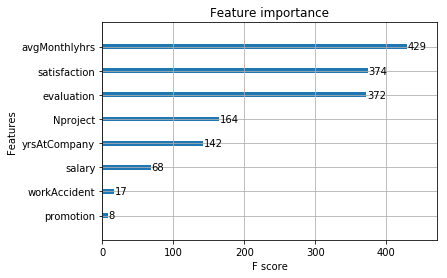

In [62]:
xgb.plot_importance(xg_clas1)
plt.rcParams['figure.figsize']=[10,10]
plt.show()

In [63]:
paras={'objective':'binary:logistic','colsample_bytree':0.75,'learning_rate':0.5,'max_depth':5, 'n_estimators':100}

X=fdata.drop('left',axis=1).values
y=fdata['left'].values
data_dim=xgb.DMatrix(data=X, label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

data_dim1=xgb.DMatrix(data=X_train,label=y_train)
cv_result=xgb.cv(dtrain=data_dim1, params=paras, nfold=5,num_boost_round=60, 
                 early_stopping_rounds=20,metrics='auc', as_pandas=True, seed=1)
cv_result.head()


,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.962184,0.001722,0.959606,0.002344
1,0.977507,0.005011,0.975683,0.004695
2,0.978219,0.003656,0.975986,0.004834
3,0.982349,0.001767,0.979157,0.002610
4,0.983991,0.001821,0.981340,0.002953


In [64]:
print(cv_result['test-auc-mean'].tail(1))

59    0.991919
Name: test-auc-mean, dtype: float64


ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

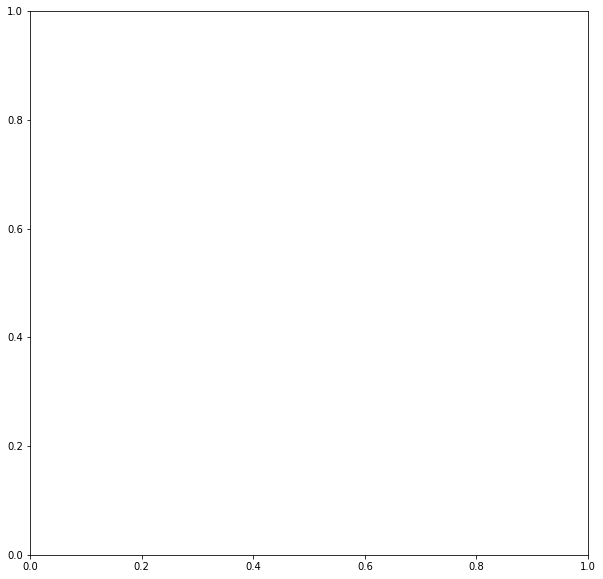

In [65]:
xg_clas2=xgb.train(params=paras, dtrain=data_dim1, num_boost_round=60)
                
import matplotlib.pyplot as plt
xgb.plot_tree(xg_clas2,num_trees=0)
plt.rcParams['figure.figsize']=[200,50]
plt.show()

In [66]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
satisfaction     14999 non-null float64
evaluation       14999 non-null float64
Nproject         14999 non-null int64
avgMonthlyhrs    14999 non-null int64
yrsAtCompany     14999 non-null int64
workAccident     14999 non-null int64
left             14999 non-null int64
promotion        14999 non-null int64
salary           14999 non-null int64
dtypes: float64(2), int64(7)
memory usage: 1.0 MB
